In [79]:
#Impoort the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline 

In [36]:
#Reading the dataset to be classified
adult = pd.read_csv(r'D:\Linear Regression\K Nearest Neighbors\adult.csv')

In [37]:
#Viewing the first few rows of the dataset
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
#Describe function used for descriptive statistics
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
#Information about the columns of dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [40]:
#Importing StandardScaler to scale our continuous data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<=50K    37155
>50K     11687
Name: income, dtype: int64


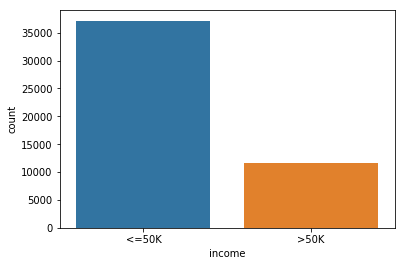

In [47]:
#Print the values of target variables
print(adult.income.value_counts())
sns.countplot(x='income',data=adult)
plt.show()

In [48]:
#Replace missing variables into NA by using replace of numpy
adult = adult.replace('?',np.NaN)

In [50]:
#Observe the number of nulls
adult.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [53]:
#let's fill null variable 
var = adult['native-country'].mode()
adult['native-country'] = adult['native-country'].replace(np.NaN,var[0])

var1 = adult.workclass.mode()[0]
adult.workclass = adult.workclass.replace(np.NaN, var1)

var2 = adult.occupation.mode()[0]
adult.occupation = adult.occupation.replace(np.NaN,var2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


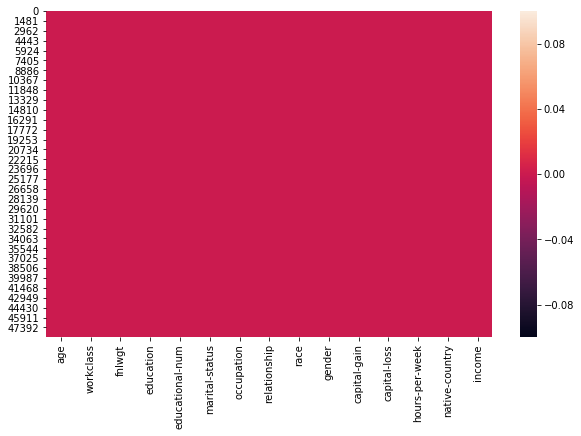

In [56]:
#again check there is null value or not
print(list(adult.isnull().sum()))
plt.figure(figsize=(10,6))
sns.heatmap(adult.isnull())
plt.show()

In [57]:
#Encode strings to integers using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['workclass', 'education','marital-status', 'occupation',
       'relationship', 'race', 'gender','native-country','income']
for col in cols:
    adult[col] = le.fit_transform(adult[col])

In [58]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


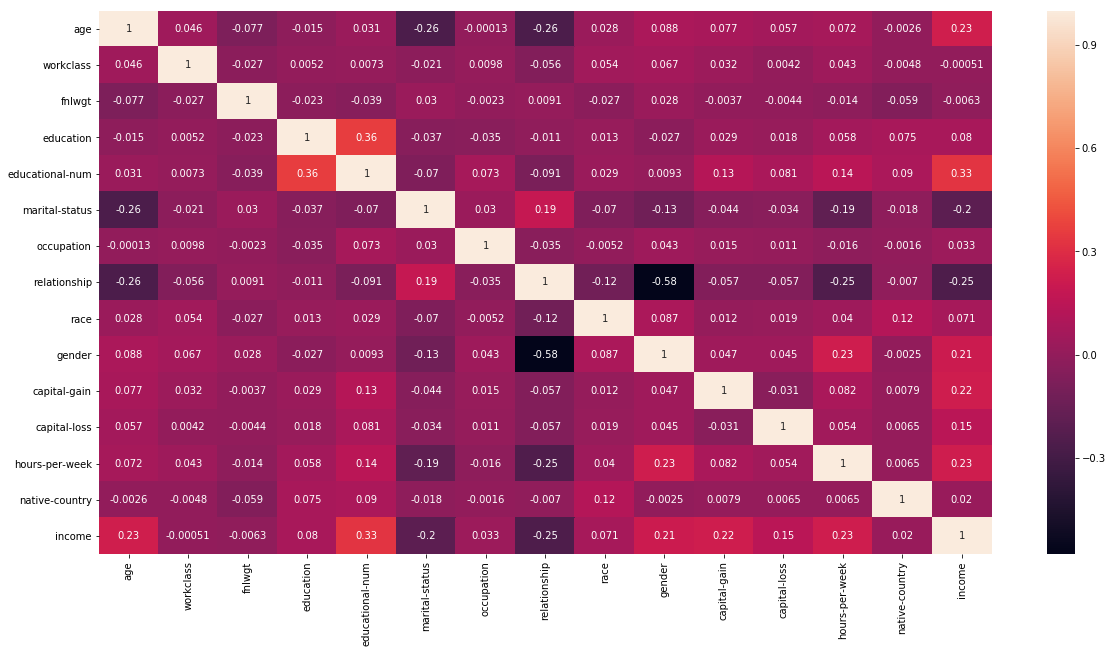

In [59]:
#Correlation among attributes
corr = adult.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [62]:
#Import StandardScaler to scale our continuous data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(adult.drop('income',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_features = scaler.transform(adult.drop('income',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [65]:
scaled_features

array([[-0.99512893, -0.08972675,  0.35167453, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [-0.04694151, -0.08972675, -0.94552415, ..., -0.2171271 ,
         0.77292975,  0.25969378],
       [-0.77631645, -1.8902337 ,  1.3947231 , ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       ...,
       [ 1.41180837, -0.08972675, -0.35751025, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [-1.21394141, -0.08972675,  0.11198424, ..., -0.2171271 ,
        -1.64812038,  0.25969378],
       [ 0.97418341,  0.81052673,  0.93049361, ..., -0.2171271 ,
        -0.03408696,  0.25969378]])

In [66]:
df_feat=pd.DataFrame(scaled_features,columns=adult.columns[:-1])

In [67]:
df_feat.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995129,-0.089727,0.351675,-2.397350,-1.197259,0.916138,-0.038505,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.259694
1,-0.046942,-0.089727,-0.945524,0.183660,-0.419335,-0.410397,-0.542436,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.259694
2,-0.776316,-1.890234,1.394723,-0.848744,0.747550,-0.410397,0.969357,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.259694
3,0.390683,-0.089727,-0.277844,1.216063,-0.030373,-0.410397,-0.038505,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.259694
4,-1.505691,-0.089727,-0.815954,1.216063,-0.030373,0.916138,0.717391,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.259694


In [60]:
#Importing train test split for splitting into train and test datasets
from sklearn.model_selection import train_test_split


In [68]:
#Dividing predictors and predicted variables
X = df_feat
y= adult['income']

In [69]:
y

0        0
1        0
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       0
28       0
29       0
        ..
48812    0
48813    1
48814    1
48815    0
48816    0
48817    1
48818    0
48819    1
48820    1
48821    0
48822    0
48823    0
48824    0
48825    0
48826    1
48827    0
48828    0
48829    0
48830    0
48831    0
48832    0
48833    0
48834    0
48835    1
48836    0
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [70]:
# spliting the data into test (30 percent) and train sets (70 percent) with 101 random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [73]:
#Importing KNeighborsCLassifier
from sklearn.neighbors import KNeighborsClassifier


In [74]:
#Specifying a variable to KNeighborsClassifier
knc = KNeighborsClassifier()

In [75]:
#Fitting on the training dataset
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
#Predicting on test dataset
pred = knc.predict(X_test)

In [78]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11122
           1       0.67      0.58      0.62      3531

   micro avg       0.83      0.83      0.83     14653
   macro avg       0.77      0.74      0.76     14653
weighted avg       0.82      0.83      0.83     14653



In [81]:
print(confusion_matrix(y_test,pred))

[[10109  1013]
 [ 1486  2045]]


In [82]:
# Ploting and checking error rate for different neighbors
error_rate = []

for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

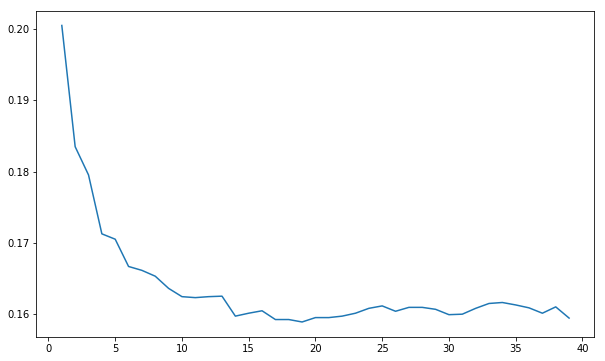

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)